In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as skms
import sklearn.tree as sktree
import sklearn.ensemble as sken
import sklearn.neighbors as skn

data=np.loadtxt("CNAE.txt",delimiter=",")
x=data[:,1:]
y=data[:,0]

In [11]:
p=np.size(x)
print('Il y a p attributs, p = ',p)
n=np.size(y)
print('Il y a n individus, n = ',n)


Il y a p attributs, p =  924480
Il y a n individus, n =  1080


[0. 1. 2. 3.] [1045   32    2    1]


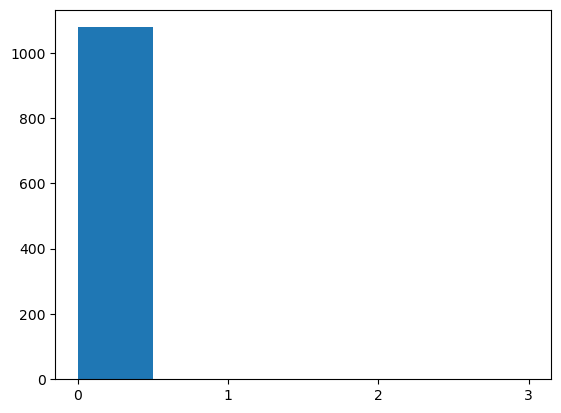

In [57]:
idxSel= 6 # sélection d'un attribut
valunique, counts = np.unique(x[:, idxSel], return_counts=True)  # Valeurs uniques et comptage des occurrences
print(valunique,counts)
fig=plt.figure()
plt.hist(data[:,idxSel],bins=valunique,width=0.5); # histogramme
fig.gca().set_xticks(valunique);

In [58]:
pourcent0=counts[0]/sum(counts) *100
print(pourcent0)

96.75925925925925


In [103]:
import random as rand

rand.seed(0)
xtrain,xtest,ytrain,ytest= skms.train_test_split(x,y,random_state=0)# split du jeu de données. Utilisez le paramètre random_state
arbre= sktree.DecisionTreeClassifier(random_state=1)# création d'un arbre de décision
arbre.fit(xtrain,ytrain) # entrainement de l'arbre
score=arbre.score( xtest, ytest) # calcul du taux de bonne classification
print(score)

0.8333333333333334


In [104]:
arbre.get_depth()

48

Meilleure profondeur : 31
Meilleur score : 0.8407407407407408


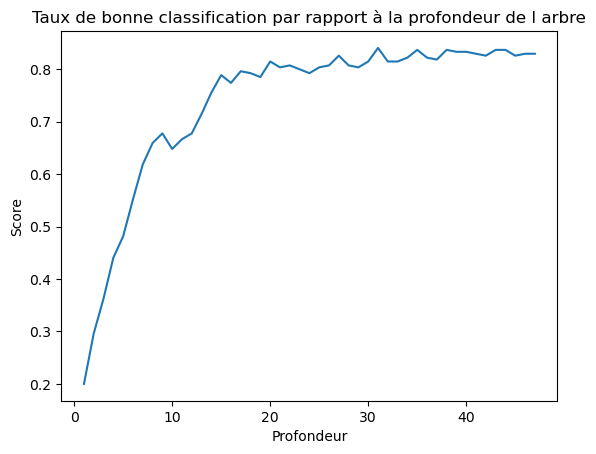

In [109]:
max_dep=arbre.get_depth()
A=[]
S=[]

best_depth = 0
best_score = 0.0

for i in range(1,max_dep):
    arbre=sktree.DecisionTreeClassifier(max_depth=i,random_state=1)
    arbre.fit(xtrain,ytrain) 
    score=arbre.score( xtest, ytest)
    A.append(arbre.get_depth())
    S.append(score)
    
    if score > best_score:
        best_score = score
        best_depth = i 

print(f"Meilleure profondeur : {best_depth}")
print(f"Meilleur score : {best_score}")    
    
plt.plot(A,S)
plt.xlabel('Profondeur')
plt.ylabel('Score')
plt.title('Taux de bonne classification par rapport à la profondeur de l arbre')
plt.show()


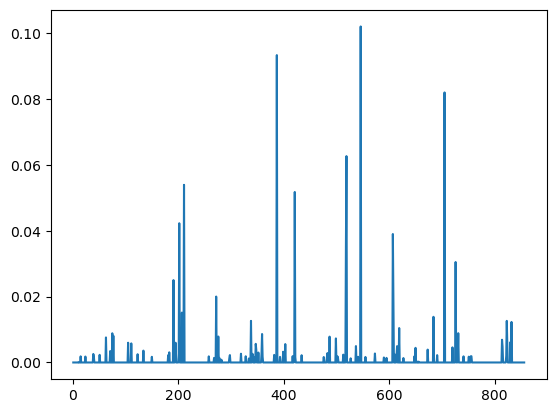

In [118]:
arbre.feature_importances_
X=[]
for i in range (1,len(arbre.feature_importances_)+1):
    X.append(i)
plt.plot(X,arbre.feature_importances_)
plt.show()

In [114]:
arbre.feature_importances_


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00011591, 0.        , 0.        , 0.        , 0.00185463,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00179667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00258324, 0.00178839,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00231829, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00760654, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00345977, 0.        , 0.00165649, 0.        , 0.00887